# Lab | Customer Analysis Round 3

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions

df= pd.read_csv('marketing_customer_analysis_clean.csv')

df= df.drop(columns=['unnamed:_0'])  #dropping the unnamed column
display(df.duplicated().sum()) #checking  for duplicated values
df= functions.remove_full_nulls(df) #removing nan rows
df= functions.duplicate_checking(df) #removing duplicate rows

443

In [11]:
# Show dataframe info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10467 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10467 non-null  object 
 1   state                          10467 non-null  object 
 2   customer_lifetime_value        10467 non-null  float64
 3   response                       10467 non-null  object 
 4   coverage                       10467 non-null  object 
 5   education                      10467 non-null  object 
 6   effective_to_date              10467 non-null  object 
 7   employmentstatus               10467 non-null  object 
 8   gender                         10467 non-null  object 
 9   income                         10467 non-null  int64  
 10  location_code                  10467 non-null  object 
 11  marital_status                 10467 non-null  object 
 12  monthly_premium_auto           10467 non-null  int6

None

In [12]:
# Describe DataFrame
display(df.describe())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000
mean,8028.822791,37526.678131,93.483711,15.132310,48.127544,0.384896,2.972294,436.993389,1.465941
std,6899.090509,30365.287470,34.665886,9.786773,27.923116,0.887489,2.394895,293.116709,0.498862
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,273.791318,1.000000
50%,5780.182197,33806.000000,83.000000,15.000000,48.000000,0.000000,2.000000,384.014030,1.000000
75%,9015.867430,62243.500000,109.000000,23.000000,71.000000,0.384256,4.000000,551.784942,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


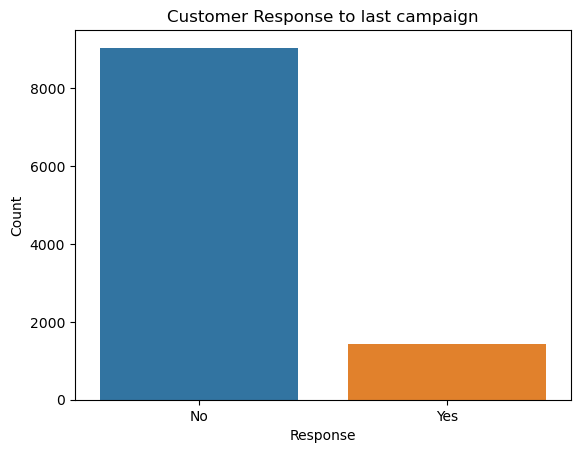

In [13]:
# Show a plot of the total number of responses
fig, ax = plt.subplots()
sns.countplot(data=df, x="response")
ax.set_xlabel("Response")
ax.set_ylabel("Count")
ax.set_title("Customer Response to last campaign")
plt.show()

,Sales channel,Customers Responded Yes,Customers Responded No
0,Agent,725,3239
1,Branch,320,2590
2,Call Center,211,1835
3,Web,175,1372


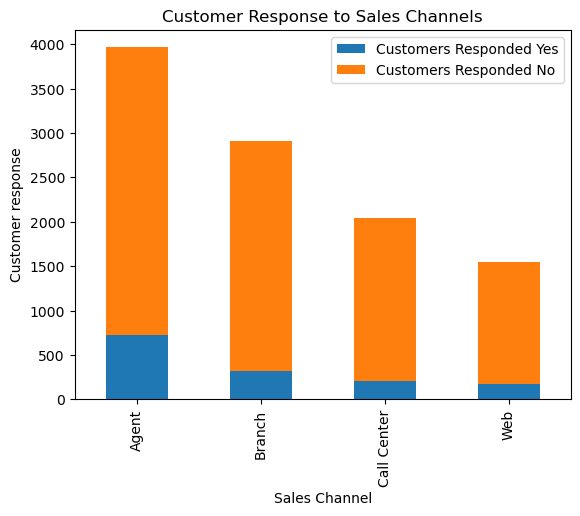

In [14]:
# Show a plot of the response rate by the sales channel.
piv= df.pivot_table(index=['sales_channel'], values= ['response'], aggfunc=[lambda x: (x == 'Yes').sum(), lambda x: (x == 'No').sum()])
piv =piv.reset_index()
piv.columns=['Sales channel', 'Customers Responded Yes' , 'Customers Responded No']
display(piv)

# Plotting on the same plot
ax= piv.plot(x='Sales channel', kind='bar', stacked=True)
ax.set_xlabel("Sales Channel")
ax.set_ylabel('Customer response')
ax.set_title("Customer Response to Sales Channels")
plt.show()



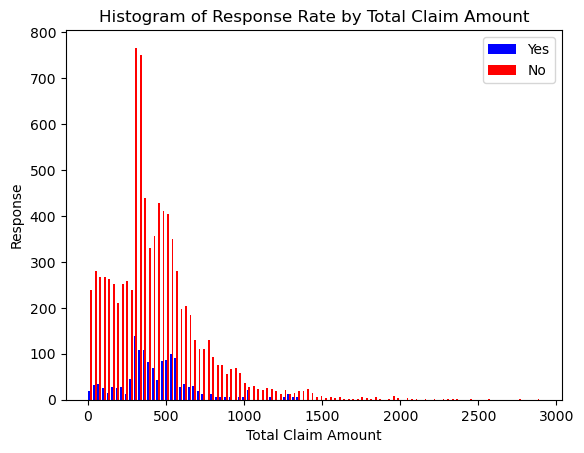

In [24]:
# Show a plot of the response rate by the total claim amount.
plt.hist([df[df['response'] == 'Yes']['total_claim_amount'], df[df['response'] == 'No']['total_claim_amount']], 
         bins=100, label=['Yes', 'No'], color=['blue', 'red'])

plt.title('Histogram of Response Rate by Total Claim Amount')
plt.xlabel('Total Claim Amount')
plt.ylabel('Response')
plt.legend()
plt.show()

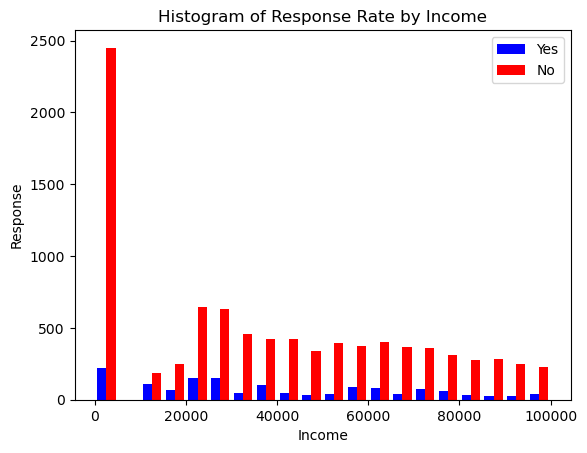

In [27]:
# Show a plot of the response rate by income.
plt.hist([df[df['response'] == 'Yes']['income'], df[df['response'] == 'No']['income']], 
         bins=20, label=['Yes', 'No'], color=['blue', 'red'])

plt.title('Histogram of Response Rate by Income')
plt.xlabel('Income')
plt.ylabel('Response')
plt.legend()
plt.show()